In [19]:
import jieba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.feature_extraction.text as ft
import sklearn.model_selection as ms
from sklearn.neighbors import KNeighborsClassifier

# 加载文件
data = pd.read_csv("htl_all.csv")
data["label"].value_counts()
print("加载数据文件完毕！")

加载数据文件完毕！


In [20]:
def func(item):
    # 分词
    seg_list = jieba.cut_for_search(item)
    return ' '.join(seg_list)


# print(data['discuss'])
data['new_review'] = data['review'].apply(func)
# print(data.head())

# 整理输入集与输出集     TFIDF
cv = ft.CountVectorizer()
bow = cv.fit_transform(data['new_review'])
tt = ft.TfidfTransformer()
tfidf = tt.fit_transform(bow)
# print(tfidf.shape)
print("tf模型构建完毕!")

# 整理数据集。拆分测试集训练集
train_x, test_x, train_y, test_y = ms.train_test_split(tfidf,
                                                       data["label"],
                                                       test_size=0.3,
                                                       random_state=7)
training_accuracy = []
test_accuracy = []
# n_neighbors 取值从1到某值
neighbors_setting = range(1, 10)
for n_neighbors in neighbors_setting:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_x, train_y)
    # 记录训练集精度
    training_accuracy.append(clf.score(train_x, train_y))
    # 记录泛化精度
    test_accuracy.append(clf.score(test_x, test_y))

tf模型构建完毕!


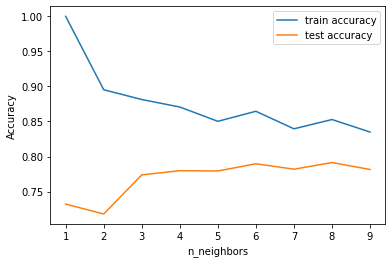

In [21]:
# 绘制训练精度和测试精度
plt.plot(neighbors_setting, training_accuracy, label="train accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 使用验证曲线，选取最优超参数

d:\administrator\documents\python\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 50) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\administrator\documents\python\lib\site-packages\ipykernel_launcher.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


<function matplotlib.pyplot.legend(*args, **kwargs)>

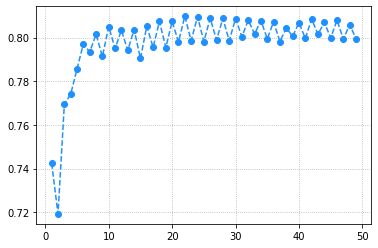

In [22]:
model = KNeighborsClassifier()
params = range(1, 50)
train_scores, test_scores = ms.validation_curve(model,
                                                train_x,
                                                train_y,
                                                'n_neighbors',
                                                params,
                                                cv=5)
scores = test_scores.mean(axis=1)
# 验证可视化操作
plt.grid(linestyle=':')
plt.plot(params, scores, 'o-',
         color="dodgerblue",
         label='random_state VC',
         linestyle='--')
plt.legend

In [25]:
test_data = ["总体来说房间非常干净，卫浴设置也相当不错，交通也比较便利",
             "酒店交通方便，环境也不错，正好是我们办公地点的旁边，感觉性价比也还可以",
             "设施还可以，服务人员态度也不错，交通还算便利",
             "酒店位于交通要道上，标志和明显很好找，晚上比较安静，早餐挺不错，服务也比较到位",
             "酒店服务态度极差，设施很差",
             "我住过的最不好的酒店，以后绝不会再住了",
             "说实在的，我很失望，我想这家酒店以后无论如何也不会再去了",
             "刚住进去，就闻到一股异味，感觉极不舒服。晚上蚊子比较多，地板上也比较脏，电视遥控器都是坏的。还这么高的价格",
             "交通不便利，环境也不怎么样，也没有早餐。但是价格便宜，性价比比价高，毕竟只有那点钱",
             "交通方便，环境也不错，房间非常干净，卫浴设置也相当不错。晚上蚊子比较多，地板上也比较脏。总之没有说的那么好", ]

test_data = pd.Series(test_data).apply(func)
# 把样本按照训练时的方式转换为tfidf矩阵，才可以继续预测
bow = cv.transform(test_data)
test_data = tt.transform(bow)

model = KNeighborsClassifier(n_neighbors=30)

model.fit(train_x, train_y)
pred_test_y = model.predict(test_data)

# 输出置信概率
pred_prob_y = model.predict_proba(test_data)

print(pred_test_y)
probs = pred_prob_y.max(axis=1)

for a, b in zip(pred_test_y, probs):
    print(a, ':', b)

[1 1 1 1 1 0 0 1 1 1]
1 : 0.9333333333333333
1 : 0.9333333333333333
1 : 0.9
1 : 0.9333333333333333
1 : 0.6
0 : 0.8
0 : 0.8666666666666667
1 : 0.6333333333333333
1 : 0.7
1 : 1.0
